
## Sales Prediction

### Objectives:

* Assess how advertising channels (TV, Radio, Newspaper) impact sales.
* Identify which advertising channels are most effective for increasing sales.
* Predict future sales based on advertising spending, aiding in budget planning.

In [22]:
# Importing required modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import kaggle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [3]:
# Downloading datatset from kaggle API
!kaggle datasets download -d bumba5341/advertisingcsv

  0%|                                               | 0.00/2.26k [00:00<?, ?B/s]
100%|███████████████████████████████████████| 2.26k/2.26k [00:00<00:00, 517kB/s]


In [4]:
# Extracting dataset file
!unzip 'advertisingcsv.zip'

Archive:  advertisingcsv.zip
  inflating: Advertising.csv         


In [5]:
# Loading the dataset
df = pd.read_csv('Advertising.csv')
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [6]:
# Removing unessential columns
df.drop(columns=['Unnamed: 0'],inplace=True)

In [8]:
# Checking for null values
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [10]:
# Checking for duplicated values
df.duplicated().sum()

0

In [14]:
# Corelation among the attributes
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


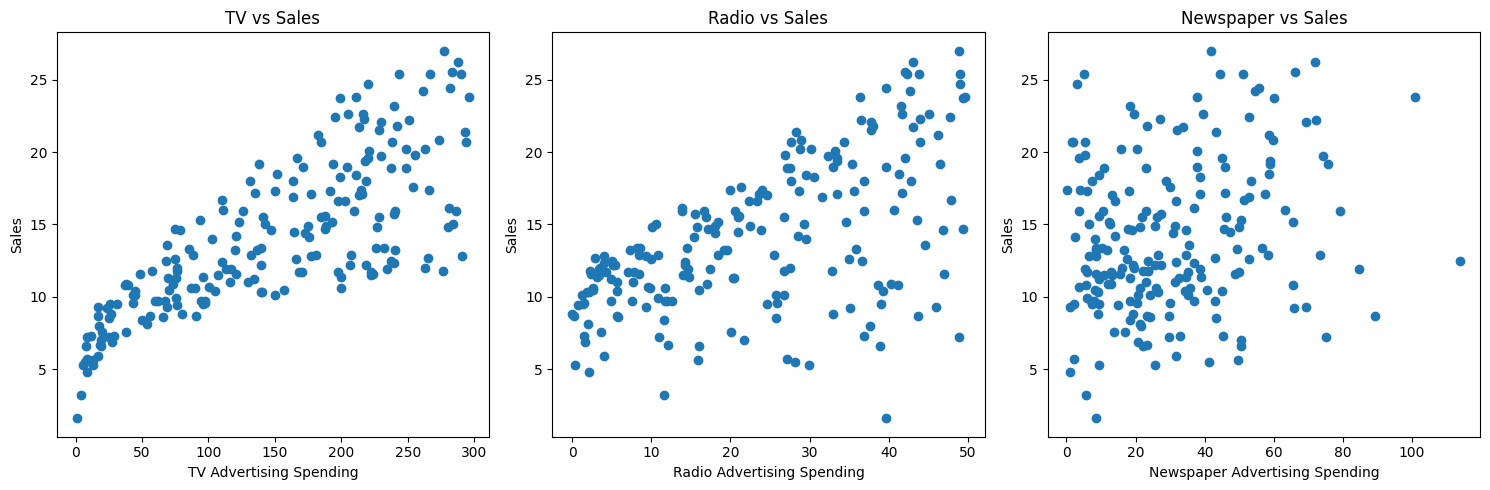

In [19]:
# Plotting scatterplots for each attribute against Sales
plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.scatter(df['TV'], df['Sales'])
plt.xlabel('TV Advertising Spending')
plt.ylabel('Sales')
plt.title('TV vs Sales')

plt.subplot(132)
plt.scatter(df['Radio'], df['Sales'])
plt.xlabel('Radio Advertising Spending')
plt.ylabel('Sales')
plt.title('Radio vs Sales')

plt.subplot(133)
plt.scatter(df['Newspaper'], df['Sales'])
plt.xlabel('Newspaper Advertising Spending')
plt.ylabel('Sales')
plt.title('Newspaper vs Sales')

plt.tight_layout()
plt.show()

In [20]:
# Linear Regression Model
# Splitting the data into features (X) and target (y)
X = df.drop(columns=['Sales'])
y = df['Sales']

In [35]:
# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Training a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train);

In [36]:
# Evaluating the model on the test set
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

print("R-squared:", r2)

R-squared: 0.9150335671751134


In [37]:
# Predictiion on new data
new_data = {
    'TV': [150.2],
    'Radio': [35.5],
    'Newspaper': [25.8]
}

In [38]:
# Creating a DataFrame for the new data
new_df = pd.DataFrame(new_data)

In [41]:
# Using the trained model to make predictions on the new data
predictions = model.predict(new_df)[0]

In [43]:
print("Predicted Sales for new investment in adverstisement: %0.2f "%predictions)

Predicted Sales for new investment in adverstisement: 16.51 
